#**ASESSMENT IPSD**
- Nama: Vania Noverina
- NIM : 2311110031
- Kelas : SD-04-B

## **Import Libraries & Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:

df = pd.read_csv('/content/soil dataset clustering.csv')

### Menampilkan 5 Data Teratas

In [3]:
df.head()

,created_at,entry_id,ambient air temp,ambient air moisture,soil temperature,soil moisture,soil pH,status
0,2021-03-18 00:58:51 EAT,1,22,68,23,55,8,Smart Farm Sensor OK
1,2021-03-18 00:58:57 EAT,2,22,67,23,55,8,Smart Farm Sensor OK
2,2021-03-18 00:59:03 EAT,3,22,67,23,55,8,Smart Farm Sensor OK
3,2021-03-18 00:59:09 EAT,4,22,67,23,55,8,Smart Farm Sensor OK
4,2021-03-18 00:59:15 EAT,5,22,67,23,55,8,Smart Farm Sensor OK


### Melihat Informasi Dataframe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            99999 non-null  object
 1   entry_id              99999 non-null  int64 
 2   ambient air temp      99999 non-null  int64 
 3   ambient air moisture  99999 non-null  int64 
 4   soil temperature      99999 non-null  int64 
 5   soil moisture         99999 non-null  int64 
 6   soil pH               99999 non-null  int64 
 7   status                99999 non-null  object
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


Pada dataframe tersebut dapat diketahui bahwa terdapat 2 jenis variabel, yaitu integer dan object. Selain itu, terdapat 99.999 data pada dataset, yang terdiri dari 8 kolom, yaitu `created_art`, `entry_id`, `ambient air temp`, `ambient air moisture`, `soil moisture`, `soil pH`, dan `status`. Dimana kolom `status` dan `created_at` bertipe data object.

### Mencari Missing Values

In [5]:
df.isnull().sum()

,0
created_at,0
entry_id,0
ambient air temp,0
ambient air moisture,0
soil temperature,0
soil moisture,0
soil pH,0
status,0


Pada data tersebut, tidak ditemukan missing values sehingga tidak perlu dilakukan imputansi/ handling missing values.

### Melihat Statistika Deskriptif

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
entry_id,99999.0,50000.000000,28867.369122,1.0,25000.5,50000.0,74999.5,99999.0
ambient air temp,99999.0,22.952740,1.642827,20.0,22.0,23.0,24.0,30.0
ambient air moisture,99999.0,64.786368,11.505256,37.0,55.0,64.0,73.0,99.0
soil temperature,99999.0,23.835318,1.436803,21.0,23.0,24.0,25.0,32.0
soil moisture,99999.0,50.151752,8.194580,29.0,44.0,50.0,56.0,95.0
soil pH,99999.0,4.426814,2.687360,-1.0,0.0,6.0,6.0,9.0


### Mencari data yang terduplikat

In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99994,False
99995,False
99996,False
99997,False


Pata data tersebut tidak ada data yang terduplikat.

### Menghapus kolom tertentu

In [8]:
df.drop(columns='created_at', inplace=True)

In [9]:
df.drop(columns='status', inplace=True)

In [10]:
df.drop(columns='entry_id', inplace=True)

Dilakukan drop pada kolom created_art dan status yang bertipe object dan kolom entry_id yang bertipe integer, karena ketiga kolom tersebut tidak berpengaruh terhadap hasil clustering.

In [11]:
# Data setelah drop kolom 'created_art' dan 'status'.
df.head(10)

,ambient air temp,ambient air moisture,soil temperature,soil moisture,soil pH
0,22,68,23,55,8
1,22,67,23,55,8
2,22,67,23,55,8
3,22,67,23,55,8
4,22,67,23,55,8
5,22,67,23,55,8
6,22,68,23,55,8
7,22,67,23,55,8
8,22,67,23,55,8
9,22,67,23,55,8


### Melihat Distribusi Data

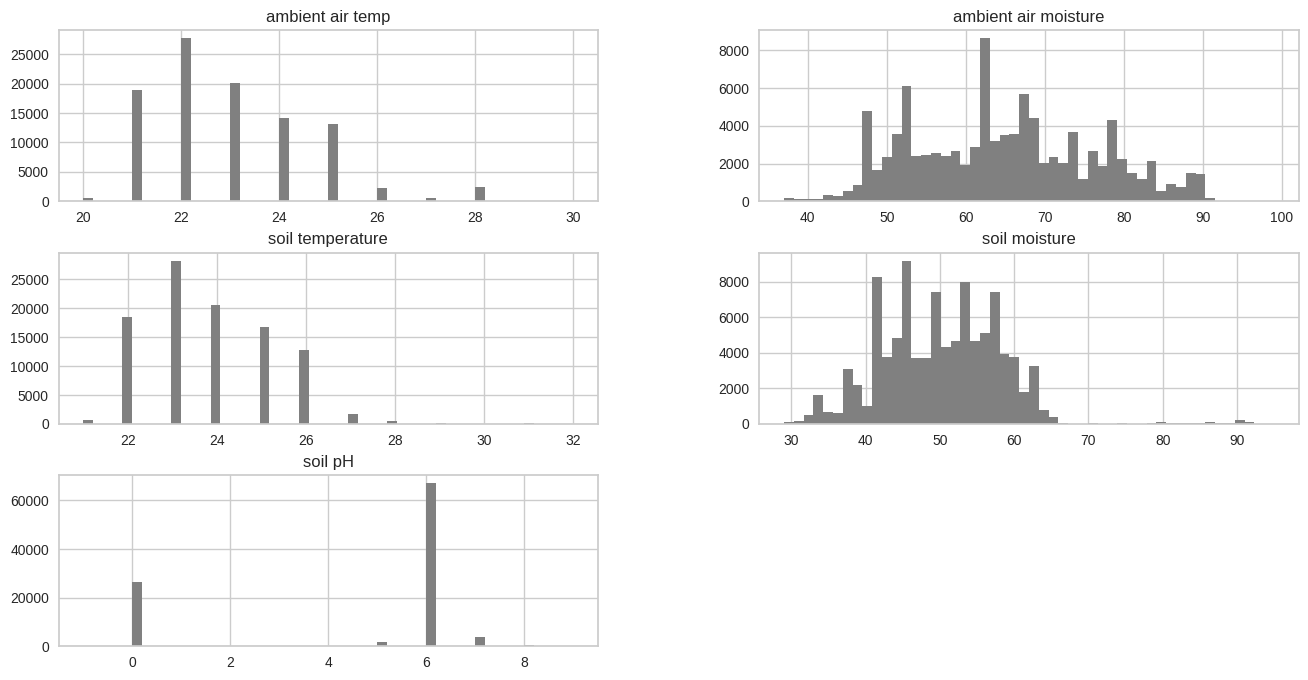

In [12]:
df.hist(bins=50, figsize=(16, 8), color="grey");

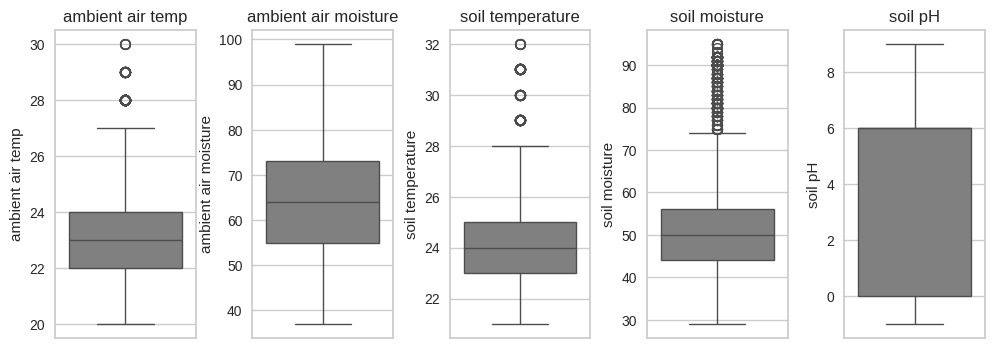

In [13]:
def box_plot(df):
    variables = df.select_dtypes(exclude='object').columns

    fig, axes =plt.subplots(1, 5, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=df, color="grey", ax=axes[i])
        axes[i].set_title(var)

    plt.show()

box_plot(df)

Berdasarkan boxplot dan bar chart tersebut, dapat diketahui bahwa data pada kolom ambient air moisture dan soil pH berdistribusi normal. Sedangkan, data pada kolom ambient air temp, soil temperature, dan soil moisture tidak berdistribusi normal.

## **Pre-Processing**

### Scalling

In [14]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df)
X_scaled

array([[0.2       , 0.5       , 0.18181818, 0.39393939, 0.9       ],
       [0.2       , 0.48387097, 0.18181818, 0.39393939, 0.9       ],
       [0.2       , 0.48387097, 0.18181818, 0.39393939, 0.9       ],
       ...,
       [0.3       , 0.5       , 0.27272727, 0.40909091, 0.7       ],
       [0.3       , 0.5       , 0.27272727, 0.40909091, 0.7       ],
       [0.3       , 0.5       , 0.27272727, 0.40909091, 0.7       ]])

## **Modelling**

### **K-MEANS**

### Metode Elbow

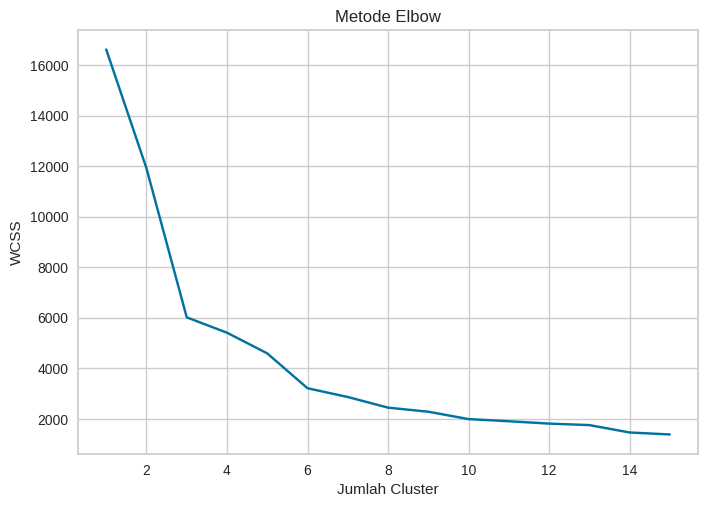

In [15]:
wcss = []
for i in range (1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Melalui metode Elbow untuk menentukan jumlah clusternya didapatkan nilai cluster 2 dan 3.

### Clustering

#### 2 Cluster

In [16]:
model1 =  KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

#### 3 Cluster

In [17]:
model2 =  KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred2 = model2.fit_predict(X_scaled)

### Visualisasi Hasil Cluster

#### 2 Cluster

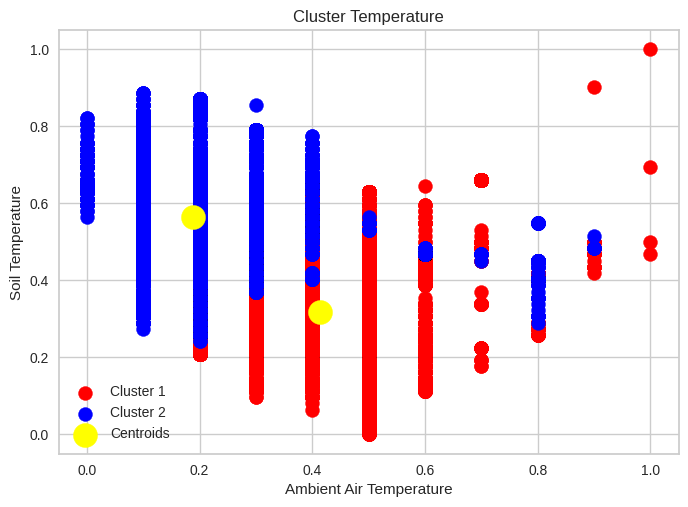

In [18]:
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
           s =  100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
           s =  100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
           s =  300, c = 'yellow', label = 'Centroids')

plt.title('Cluster Temperature')
plt.xlabel('Ambient Air Temperature')
plt.ylabel('Soil Temperature')
plt.legend()
plt.show()

### Menghitung Silhouette Score Algoritma K-Means

In [19]:
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Slihouette Score:", Evaluasi_KMeans)

Slihouette Score: 0.29281695101240074


Silhouette Score digunakan untuk mengukur jarak antar cluster dan seberapa baik setiap titik data dalam cluster tertentu ditempatkan. Silhoutte Score memiliki range -1 sampai 1.
- Nilai positif : titik data lebih dekat dengan clusternya sendiri daripada cluster tetangga dekatnya.
- Nilai negatif : titik data mungkin ditempatkan pada cluster yang salah.
- Nilai 0 : titik data berada di dekat batas antara dua cluster.

Semakin tinggi tinggi nilai Silhoutte Score (mendekati 1) semakin bagus posisi titik data tersebut, karena berada dalam cluster yang sesuai.

Dari hasil Silhoutte Score menggunakan K-Means 2 cluster didapatkan score 0.29 atau dibulatkan menjadi 0.3, yang menunjukan nilai yang kurang baik karena cluster tidak dapat terpisah dengan baik dan jelas.

In [20]:
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 1.468124990393879


Davies-Bouldin Index menghitung rata-rata nilai setiap titik pada himpunan data. Jumlah klaster terbaik ditunjukkan dengan nilai DB yang semakin kecil (mendekati 0). Dari hasil pengukuran menggunakan Davies-Bouldin Index diatas menunjukan hasil yang cukup optimal yang berarti bahwa cluster memiliki separasi yang cukup jelas.

##### Membuat Silhouette Visualisation untuk algoritma k-means

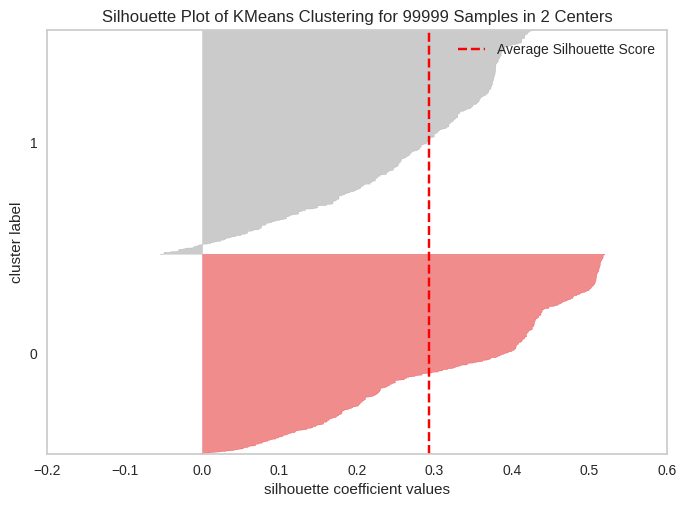

In [21]:
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Berdasarkan grafik silhouette menggunakan 2 klaster pada algoritma K-Means didapatkan nilai silhouette untuk klaster 0 = 0.5 dan klaster 1 = 0.4. Rata-rata nilai silhouette dari kedua klaster adalah 0.3. Dimana panjang/ jumlah silhouette coefficient values nya berbeda. Selain itu, sebagian besar data memiliki silhouette coefficient values yang bagus karena berada dalam cluster yang sesuai tetapi ditemukan juga beberapa nilai negatif yang berarti bahwa terdapat beberapa titik data yang berada pada klaster yang salah.

#### 3 Cluster

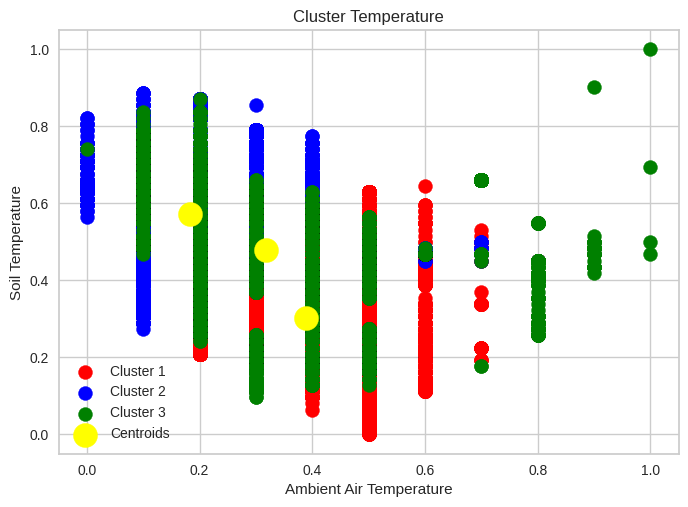

In [22]:
plt.scatter(X_scaled[y_pred2 == 0, 0], X_scaled[y_pred2 == 0, 1],
           s =  100, c = 'red', label = 'Cluster 1')

plt.scatter(X_scaled[y_pred2 == 1, 0], X_scaled[y_pred2 == 1, 1],
           s =  100, c = 'blue', label = 'Cluster 2')

plt.scatter(X_scaled[y_pred2 == 2, 0], X_scaled[y_pred2 == 2, 1],
           s =  100, c = 'green', label = 'Cluster 3')

plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1],
           s =  300, c = 'yellow', label = 'Centroids')

plt.title('Cluster Temperature')
plt.xlabel('Ambient Air Temperature')
plt.ylabel('Soil Temperature')
plt.legend()
plt.show()

In [23]:
Evaluasi_KMeans2 = silhouette_score(X_scaled, y_pred2)
print("Slihouette Score 3 Cluster:", Evaluasi_KMeans2)

Slihouette Score 3 Cluster: 0.42567613703366436


In [24]:
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.8506882655528707


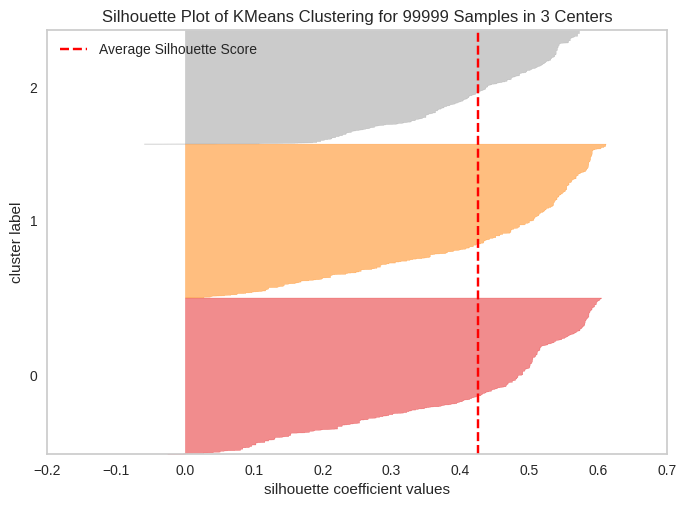

In [25]:
silhouette_viz = SilhouetteVisualizer(model2)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Berdasarkan grafik silhouette menggunakan 3 klaster pada algoritma K-Means didapatkan nilai silhouette untuk klaster 0 = 0.6, klaster 1 = 0.6, dan klaster 2 = 0.55. Dimana hampir setiap cluster memiliki jumlah/ lebar yang hampir sama/ rata. Rata-rata nilai silhouette dari kedua klaster adalah 0.42. Sebagian besar data memiliki silhouette coefficient values yang bagus karena berada dalam cluster yang sesuai karena tidak ditemukan nilai negatif.

### **Kesimpulan:**
---
Untuk algoritma K-Means hasil nilai silhouette dan DBI lebih bagus 3 cluster (0.4 dan 0.85) dibandingkan 2 cluster (0.3 dan 1.47). Semakin mendekati 0 maka nilai DBI semakin bagus. Sedangkan semakin mendekati 1 maka semakin bagus nilai silhoutte. Sehingga, dapat disimpulkan bahwa clustering dengan 2 sentroid pada algoritma K-Means kurang cocok untuk data tersebut.
